## Synthetic construct 1 (cc1 run MinIon from EpiNano paper) iForest prediction analysis

    15/03/2022

Data have been produced by *CtoUclassifier_pipe_currents_extraction_step* pipeline.

In [1]:
# import basic modules
import os, sys
import pysam
from tqdm import tqdm

# add parent folder of the C_to_U_classifier_plus_min package to path in order to be loaded into the current session
sys.path.append("/lustrehome/afonzino")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from C_to_U_classifier_plus_min import utils
import scipy.stats as stats

In [2]:
# define input paths for iForest prediction on basecalling features
dfCTaggr_filepath = "/lustre/bio_running/C_to_U_editing_minimap2_spliced/cc1.model_iForestcc1_pretrained_results/df_CT_predicted_aggregated.tsv"
ref_filepath = "/lustre/bio_running/curlcakes_runs/refs/cc.fasta"

In [3]:
# find distribution of T frequency T before and after correction
dfCTaggr = pd.read_table(dfCTaggr_filepath)
dfCTaggr = dfCTaggr.query("strand == '+'")
dfCTaggr

,region,position,strand,T_native,T_corrected,depth_stranded,Tfreq_native,Tfreq_corrected
0,chr1,37,+,2,0,541,0.003697,0.000000
1,chr1,47,+,68,21,4479,0.015182,0.004689
2,chr1,55,+,26,18,4549,0.005716,0.003957
3,chr1,61,+,39,3,4405,0.008854,0.000681
4,chr1,62,+,86,22,4565,0.018839,0.004819
...,...,...,...,...,...,...,...,...
2555,chr4,2719,+,51,10,11989,0.004254,0.000834
2556,chr4,2722,+,4957,415,11926,0.415646,0.034798
2557,chr4,2723,+,280,28,12034,0.023267,0.002327
2558,chr4,2727,+,54,4,12100,0.004463,0.000331


In [4]:
dfCTaggr.Tfreq_native.describe()

count    2472.000000
mean        0.025103
std         0.035890
min         0.000136
25%         0.004412
50%         0.012737
75%         0.030348
max         0.415646
Name: Tfreq_native, dtype: float64

In [5]:
dfCTaggr.Tfreq_corrected.describe()

count    2472.000000
mean        0.002587
std         0.004923
min         0.000000
25%         0.000293
50%         0.001043
75%         0.002837
max         0.077175
Name: Tfreq_corrected, dtype: float64

In [6]:
# calculate 95th percentile to be used as threshold
np.percentile(dfCTaggr.Tfreq_corrected, 95)

0.0101944997169398

In [7]:
# calculate 99th percentile to be used as threshold
np.percentile(dfCTaggr.Tfreq_corrected, 99)

0.02224917178833842

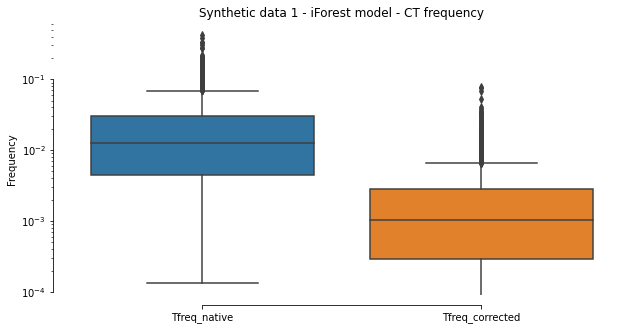

In [8]:
plt.figure(figsize=(10,5))
sn.boxplot(data=dfCTaggr[["Tfreq_native", "Tfreq_corrected"]])
plt.yscale("log")
plt.title("Synthetic data 1 - iForest model - CT frequency")
plt.ylabel("Frequency")
sn.despine(offset=10, trim=True)
plt.savefig("/lustre/bio_running/C_to_U_editing_minimap2_spliced/src_jupyter_notebooks_multi_thr/cc1/cc1.iForest.aggregated.boxplot.tiff")
plt.show()

/lustrehome/afonzino/C_to_U_classifier_plus_min/utils.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tfreq_native"] = df["Tfreq_native"] + offset
/lustrehome/afonzino/C_to_U_classifier_plus_min/utils.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tfreq_corrected"] = df["Tfreq_corrected"] + offset


[2022-03-17 11:18:00.234913] Retrieving Contigs and lengths...
[2022-03-17 11:18:00.235215] Merging dataframes for region chr1...
[2022-03-17 11:18:00.239471] Merging finished....start plotting...


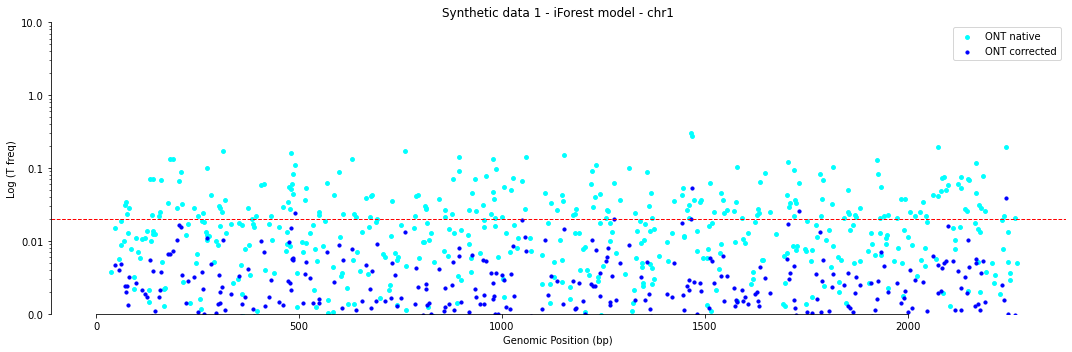

[2022-03-17 11:18:00.718086] Merging dataframes for region chr2...
[2022-03-17 11:18:00.722642] Merging finished....start plotting...


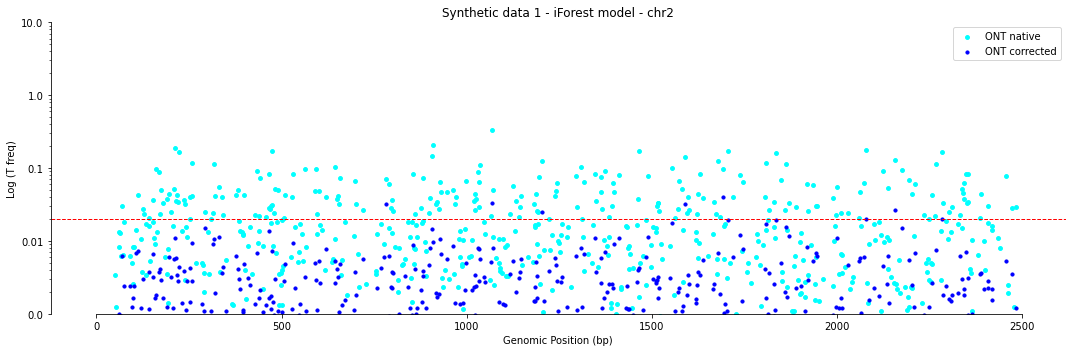

[2022-03-17 11:18:01.139871] Merging dataframes for region chr3...
[2022-03-17 11:18:01.144598] Merging finished....start plotting...


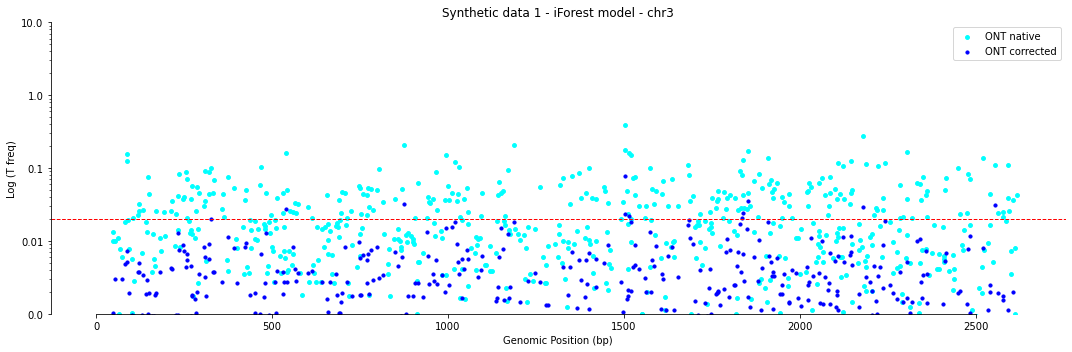

[2022-03-17 11:18:01.564137] Merging dataframes for region chr4...
[2022-03-17 11:18:01.568877] Merging finished....start plotting...


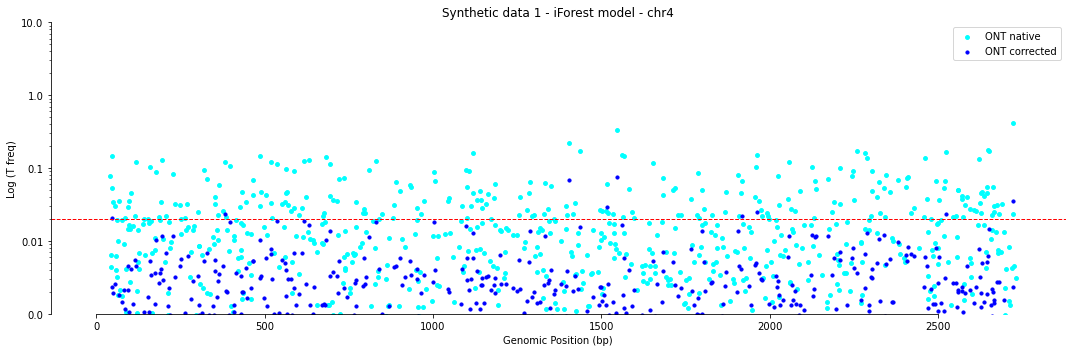

In [9]:
utils.plot_frequencies(reference_filepath=ref_filepath, 
                       df_aggregated_filepath=dfCTaggr_filepath, 
                       title="Synthetic data 1 - iForest model",
                       save_folderpath="/lustre/bio_running/C_to_U_editing_minimap2_spliced/src_jupyter_notebooks_multi_thr/cc1",
                       log=True,
                       offset=0,
                       native_color="cyan",
                       corrected_color="blue",
                       native_size=15,
                       corrected_size=10,
                       strand="+")

## 5mer level analys of residual errors

In [10]:
ref = pysam.FastaFile(ref_filepath)
total_Cs = 0 
for r in ref.references:
    Cs = ref.fetch(r).count("C")
    total_Cs += Cs
    print(r, Cs)
print("Total Cs:", total_Cs)
ref.close()

chr1 549
chr2 608
chr3 645
chr4 719
Total Cs: 2521


In [11]:
dfCTaggr

,region,position,strand,T_native,T_corrected,depth_stranded,Tfreq_native,Tfreq_corrected
0,chr1,37,+,2,0,541,0.003697,0.000000
1,chr1,47,+,68,21,4479,0.015182,0.004689
2,chr1,55,+,26,18,4549,0.005716,0.003957
3,chr1,61,+,39,3,4405,0.008854,0.000681
4,chr1,62,+,86,22,4565,0.018839,0.004819
...,...,...,...,...,...,...,...,...
2555,chr4,2719,+,51,10,11989,0.004254,0.000834
2556,chr4,2722,+,4957,415,11926,0.415646,0.034798
2557,chr4,2723,+,280,28,12034,0.023267,0.002327
2558,chr4,2727,+,54,4,12100,0.004463,0.000331


In [12]:
with tqdm(total=dfCTaggr.shape[0]) as pbar:
    refs = []
    ref = pysam.FastaFile(ref_filepath)
    for s in dfCTaggr.itertuples():
        site = f"{s.region}:{s.position}{s.strand}"
        pos1based=s.position
        pos0based=pos1based-1
        start=pos0based-2
        stop=pos0based+3
        strand = s.strand
        reference = ref.fetch(s.region, start, stop)
        if strand == "+":
            refs.append(reference)
        elif strand == "-":
            refs.append(utils.get_rev_compl(reference))
        else:
            # stange strand. append unkwnown value as "."
            refs.append(".")
        pbar.update(1)
    ref.close()
dfCTaggr["5mer"] = refs

100%|██████████| 2472/2472 [00:00<00:00, 180466.11it/s]


In [13]:
dfCTaggr[dfCTaggr.Tfreq_corrected > 0.02].groupby("5mer").Tfreq_corrected.describe().sort_values("max")

,count,mean,std,min,25%,50%,75%,max
5mer,,,,,,,,
AGCTG,1.0,0.020619,NaN,0.020619,0.020619,0.020619,0.020619,0.020619
CCCTC,1.0,0.020780,NaN,0.020780,0.020780,0.020780,0.020780,0.020780
CGCTA,1.0,0.021713,NaN,0.021713,0.021713,0.021713,0.021713,0.021713
GCCGA,1.0,0.021872,NaN,0.021872,0.021872,0.021872,0.021872,0.021872
GCCGT,1.0,0.023172,NaN,0.023172,0.023172,0.023172,0.023172,0.023172
TTCAT,1.0,0.023632,NaN,0.023632,0.023632,0.023632,0.023632,0.023632
TGCCG,1.0,0.024390,NaN,0.024390,0.024390,0.024390,0.024390,0.024390
TTCGG,1.0,0.024559,NaN,0.024559,0.024559,0.024559,0.024559,0.024559
TACTA,1.0,0.025131,NaN,0.025131,0.025131,0.025131,0.025131,0.025131


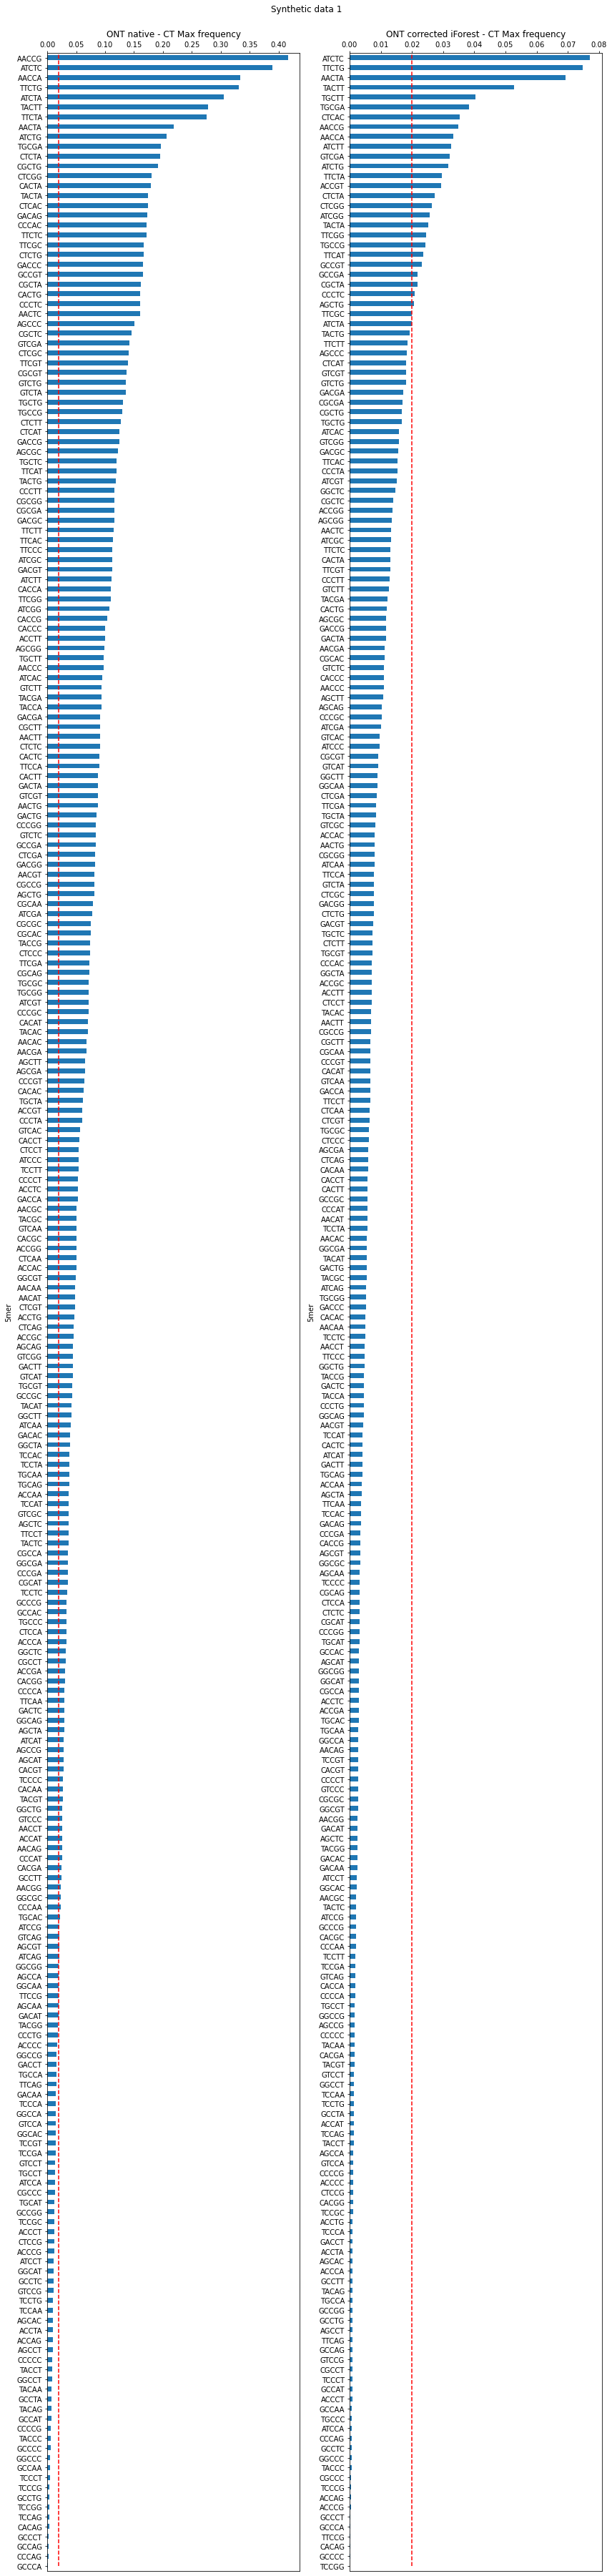

In [14]:
f, axes = plt.subplots(1,2, figsize=(12,50))

dfCTaggr.groupby("5mer").Tfreq_native.describe().sort_values("max")["max"].plot.barh(ax=axes[0])
axes[0].vlines(0.02, 0, 256, "r", "--")
axes[0].set_title("ONT native - CT Max frequency")
axes[0].xaxis.tick_top()

dfCTaggr.groupby("5mer").Tfreq_corrected.describe().sort_values("max")["max"].plot.barh(ax=axes[1])
axes[1].vlines(0.02, 0, 256, "r", "--")
axes[1].set_title("ONT corrected iForest - CT Max frequency")
axes[1].xaxis.tick_top()

plt.suptitle("Synthetic data 1", y= 1.00)
plt.tight_layout()
plt.savefig("Max CT freq error before and after iForest correction.tiff", dpi=100)
plt.show()

In [15]:
# save to disk table with all the max frequency to be used as custom threshold for each 5mer
dfCTaggr.groupby("5mer").Tfreq_corrected.describe().sort_values("max")["max"].to_csv("cc1.iforest.freq_thresholds.tsv", sep="\t")

In [16]:
dfCTaggr["reduction"] = ((dfCTaggr.T_corrected-dfCTaggr.T_native)/dfCTaggr.T_native) * 100
dfCTaggr

,region,position,strand,T_native,T_corrected,depth_stranded,Tfreq_native,Tfreq_corrected,5mer,reduction
0,chr1,37,+,2,0,541,0.003697,0.000000,GGCTG,-100.000000
1,chr1,47,+,68,21,4479,0.015182,0.004689,GTCGA,-69.117647
2,chr1,55,+,26,18,4549,0.005716,0.003957,ATCAA,-30.769231
3,chr1,61,+,39,3,4405,0.008854,0.000681,AACCT,-92.307692
4,chr1,62,+,86,22,4565,0.018839,0.004819,ACCTT,-74.418605
...,...,...,...,...,...,...,...,...,...,...
2555,chr4,2719,+,51,10,11989,0.004254,0.000834,GACAA,-80.392157
2556,chr4,2722,+,4957,415,11926,0.415646,0.034798,AACCG,-91.628001
2557,chr4,2723,+,280,28,12034,0.023267,0.002327,ACCGA,-90.000000
2558,chr4,2727,+,54,4,12100,0.004463,0.000331,AACAA,-92.592593


In [24]:
dfCTaggr.query("reduction > -50")

,region,position,strand,T_native,T_corrected,depth_stranded,Tfreq_native,Tfreq_corrected,5mer,reduction
2,chr1,55,+,26,18,4549,0.005716,0.003957,ATCAA,-30.769231
98,chr1,397,+,3,2,5505,0.000545,0.000363,TCCAG,-33.333333
299,chr1,1192,+,3,2,8084,0.000371,0.000247,TCCCT,-33.333333
581,chr2,98,+,8,5,3075,0.002602,0.001626,TCCAC,-37.500000
637,chr2,292,+,89,55,3603,0.024702,0.015265,CCCTA,-38.202247
651,chr2,368,+,5,3,3742,0.001336,0.000802,GCCGT,-40.000000
744,chr2,776,+,36,24,4023,0.008949,0.005966,ATCAA,-33.333333
759,chr2,834,+,22,13,3931,0.005597,0.003307,GTCAT,-40.909091
1039,chr2,1940,+,1,1,6566,0.000152,0.000152,GCCCC,0.000000
1391,chr3,940,+,23,15,1124,0.020463,0.013345,AACTC,-34.782609


In [17]:
dfCTaggr.groupby("5mer").describe().reduction.sort_values("max")

,count,mean,std,min,25%,50%,75%,max
5mer,,,,,,,,
TCCGG,4.0,-100.000000,0.000000,-100.0,-100.000000,-100.000000,-100.000000,-100.000000
ACCCG,9.0,-98.344513,2.137533,-100.0,-100.000000,-100.000000,-96.491228,-94.736842
CTCTC,9.0,-96.499953,2.028914,-100.0,-97.276265,-96.000000,-95.200000,-94.146341
TGCCA,6.0,-98.458350,2.546977,-100.0,-100.000000,-100.000000,-97.580645,-93.975904
GACAC,4.0,-98.098776,2.882248,-100.0,-100.000000,-99.242424,-97.341200,-93.910256
...,...,...,...,...,...,...,...,...
GCCCC,6.0,-83.333333,40.824829,-100.0,-100.000000,-100.000000,-100.000000,0.000000
AGCCT,12.0,-79.903958,29.035213,-100.0,-100.000000,-89.950062,-77.960526,0.000000
TCCAG,11.0,-72.416372,32.437520,-100.0,-100.000000,-80.000000,-60.714286,0.000000
